In [1]:
import cv2

0.0

array([[0.]], dtype=float32)

array([[0., 0., 0.]], dtype=float32)

array([[ 17., 365., 450.]], dtype=float32)

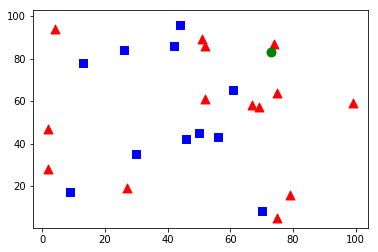

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data 
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
z=np.vectorize(trainData)
# Labels each one either Red or Blue with numbers 0 and 1 
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
h=np.vectorize(responses)
# Take Red families and plot them 
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them 
blue = trainData[responses.ravel()==1] 
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32) 
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)
display(ret, results, neighbours, dist)

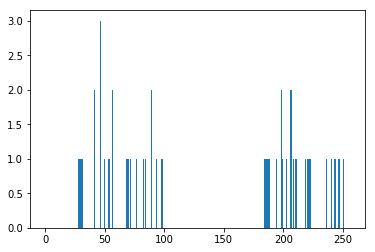

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
         0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0., 0., 1., 0.,
         0., 0., 2., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,

In [3]:
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25) 
z = np.hstack((x,y)) 
z = z.reshape((50,1)) 
z = np.float32(z) 
plt.hist(z,256,[0,256]),plt.show()


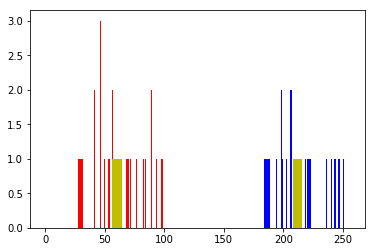

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)
A = z[labels==0] 
B = z[labels==1]
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b') 
plt.hist(centers,32,[0,256],color = 'y') 
plt.show()


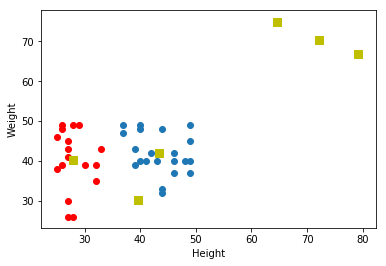

In [10]:
X = np.random.randint(25,50,(50,3))
Y = np.random.randint(60,85,(50,3)) 
Z = np.vstack((X,Y))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
ret,label,center=cv2.kmeans(Z,6,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
A = Z[label.ravel()==0] 
B = Z[label.ravel()==1]
plt.scatter(A[:,0],A[:,1]) 
plt.scatter(B[:,0],B[:,1],c = 'r') 
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's') 
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [9]:
img=cv2.imread('Great.jpg')
Z=img.reshape((-1,3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center) 
res = center[label.flatten()] 
res2 = res.reshape((img.shape))
print(res2)
cv2.imshow('res2',res2)
cv2.waitKey(0) 
cv2.destroyAllWindows()

[[[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [120 228 251]
  [120 228 251]
  [120 228 251]]

 [[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [120 228 251]
  [120 228 251]
  [120 228 251]]

 [[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [120 228 251]
  [120 228 251]
  [120 228 251]]

 ...

 [[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [ 88 105 170]
  [ 88 105 170]
  [ 88 105 170]]

 [[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [ 88 105 170]
  [ 88 105 170]
  [ 88 105 170]]

 [[203 250 252]
  [203 250 252]
  [203 250 252]
  ...
  [ 88 105 170]
  [ 88 105 170]
  [ 88 105 170]]]


In [11]:
z=np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.reshape((-1,3))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [16]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
img=cv2.imread('me.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces: 
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) 
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
    eyes = eye_cascade.detectMultiScale(roi_gray) 
    for (ex,ey,ew,eh) in eyes: 
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()


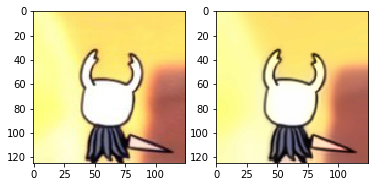

In [13]:
img=plt.imread('Great.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst) 
plt.show()


In [1]:
import numpy as np 
import cv2
from numba import jit
@jit
def rl1():
    cap = cv2.VideoCapture(0)
    while(True):
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(hsv,127,255,1)
        blur=cv2.bilateralFilter(thresh,3,15,15)
        ct,img=cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        for cnt in ct:
            ep=1e-20*cv2.arcLength(cnt,True)
            approx=cv2.approxPolyDP(cnt,ep,True)
            img=cv2.drawContours(frame,[approx],-1,(0,255,0),1)
            x,y,w,h=cv2.boundingRect(cnt)
            thre=200*180
            if  w*h>thre:
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
            cv2.imshow('rect',img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release() 
    cv2.destroyAllWindows()

In [ ]:
rl1()

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [ ]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
while (True):
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),6)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eye=eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eye:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,0,255),6)
    cv2.imshow('img',img)
    k=cv2.waitKey(30)& 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()
            

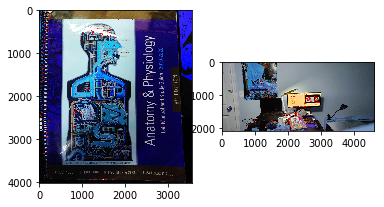

In [15]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
#corner detection 
img=cv2.imread('object.jpg')
img2=cv2.imread('case.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)
corners=cv2.goodFeaturesToTrack(gray,300,0.01,10)
corners=np.int0(corners)
for corner in corners:
    x,y=corner.ravel()
    cv2.circle(img,(x,y),6,255,6)
gray1=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray1=np.float32(gray1)
corners1=cv2.goodFeaturesToTrack(gray1,300,0.01,10)
corners1=np.int0(corners1)
for corner2 in corners1:
    x,y=corner2.ravel()
    cv2.circle(img2,(x,y),6,255,6)
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(img2)
plt.savefig('vvv.jpg',dpi=1250)

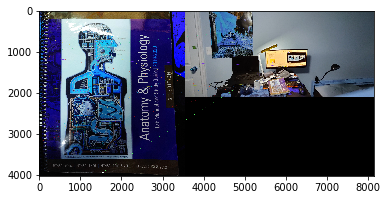

In [16]:
#feature detection 
img2=cv2.imread('case.jpg',1)
img1=cv2.imread('object.jpg',1)
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches, key=lambda x:x.distance)
img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
plt.imshow(img3)
plt.savefig('vv.jpg',dpi=1200)

In [72]:
import cv2
img1=cv2.imread('Ray2.jpg',1)
cap=cv2.VideoCapture(0)
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(img1,None)
display(kp1,des1)
while (True):
    ret,img=cap.read()
    kp2,des2=orb.detectAndCompute(img,None)
    bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    matches=bf.match(des1,des2)
    matches=sorted(matches, key=lambda x:x.distance)
    img3=cv2.drawMatches(img1,kp1,img,kp2,matches[:5],None,flags=2)
    cv2.imshow('img',img3)
    k=cv2.waitKey(30)& 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()
    

[<KeyPoint 000001BAD9AA54B0>,
 <KeyPoint 000001BADA4CEE70>,
 <KeyPoint 000001BADA4CED80>,
 <KeyPoint 000001BADA648270>,
 <KeyPoint 000001BADA648750>,
 <KeyPoint 000001BADA648C30>,
 <KeyPoint 000001BADA849720>,
 <KeyPoint 000001BADA849840>,
 <KeyPoint 000001BADA8497B0>,
 <KeyPoint 000001BADA8497E0>,
 <KeyPoint 000001BADA849810>,
 <KeyPoint 000001BADA849870>,
 <KeyPoint 000001BADA8498A0>,
 <KeyPoint 000001BADA8498D0>,
 <KeyPoint 000001BADA849900>,
 <KeyPoint 000001BADA849930>,
 <KeyPoint 000001BADA849960>,
 <KeyPoint 000001BADA849990>,
 <KeyPoint 000001BADA8499C0>,
 <KeyPoint 000001BADA8499F0>,
 <KeyPoint 000001BADA849A20>,
 <KeyPoint 000001BADA849A50>,
 <KeyPoint 000001BADA849A80>,
 <KeyPoint 000001BADA849AB0>,
 <KeyPoint 000001BADA849AE0>,
 <KeyPoint 000001BADA849B10>,
 <KeyPoint 000001BADA849B40>,
 <KeyPoint 000001BADA849B70>,
 <KeyPoint 000001BADA849BA0>,
 <KeyPoint 000001BADA849BD0>,
 <KeyPoint 000001BADA849C00>,
 <KeyPoint 000001BADA849C30>,
 <KeyPoint 000001BADA849C60>,
 <KeyPoint

array([[135,  87, 227, ..., 247,  49, 245],
       [ 92, 179, 158, ...,  66, 175,   3],
       [112, 157,  23, ..., 106, 228,  42],
       ...,
       [217, 217,  92, ..., 179,  74,  41],
       [101,  52, 152, ..., 225, 154,  16],
       [ 66, 252, 159, ..., 208, 131, 139]], dtype=uint8)

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
fgbg=cv2.createBackgroundSubtractorMOG2()
display(fgbg)
while True:
    ret,frame=cap.read()
    (x,y,z)=frame.shape
    fgmask=fgbg.apply(frame)
    if fgmask.any()==127:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),6)
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=frame[y:y+h,x:x+w]
            eye=eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eye:
                cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,0,255),6)
        cv2.imshow('img',frame)
        cv2.imshow('mask',fgmask)
    k=cv2.waitKey(30)& 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()
    

<BackgroundSubtractorMOG2 0000014896F93D10>

In [20]:
import numpy as np
a=np.array([[0, 0, 0,0, 0, 0],
       [0, 0, 0,0, 0, 0],
       [0, 0, 0, 0, 0, 0]])
k=a.sum()
k

0

In [7]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

def getco():
    img=cv2.imread('me.jpg')
    face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    [(x,y,w,h)]=faces
    return x,y,w,h
def backg():
    x,y,w,h=getco()
    img=cv2.imread('me.jpg')
    rect=[x,y,x+w,y+h]
    bgd=np.zeros((1,65),np.float64)
    fore=np.zeros((1,65),np.float64)
    mask=np.zeros(img.shape[:2],np.uint8)
    cv2.grabCut(img,mask,rect,bgd,fore,5,cv2.GC_INIT_WITH_RECT)
    mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img=img*mask2[:,:,np.newaxis]
    plt.imshow(img)
    plt.colorbar()
    plt.show()


In [25]:
a=cv2.imread('me.jpg')
a.shape

(1932, 1623, 3)

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
while (True):
    bgd=np.zeros((1,65),np.float64)
    fore=np.zeros((1,65),np.float64)
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask=np.zeros(img.shape[:2],np.uint8)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        rect=(x,y,x+w,y+h)
        cv2.grabCut(img,mask,rect,bgd,fore,5,cv2.GC_INIT_WITH_RECT)
        mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
        img=img*mask2[:,:,np.newaxis]
    cv2.imshow('img',img)
    k=cv2.waitKey(30)& 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

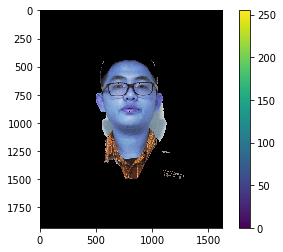

In [106]:
img=cv2.imread('me.jpg')
mask=np.zeros(img.shape[:2],np.uint8)
bgd=np.zeros((1,65),np.float64)
fore=np.zeros((1,65),np.float64)
rect=(501,440,1120,1059)
cv2.grabCut(img,mask,rect,bgd,fore,7,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
img=img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import quandl
import math
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from statistics import mean
import random 
from sklearn import neighbors
from collections import Counter
import warnings

In [ ]:
df=pd.read_csv('Jin.csv')
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,114.570,114.9200,112.8500,113.22,2168100.0,0.000,1.0,97.234265,97.531306,95.774520,96.088535,2168100.0
2013-09-04,113.080,114.8650,113.0800,114.55,2312200.0,0.000,1.0,95.969718,97.484628,95.969718,97.217291,2312200.0
2013-09-05,114.350,115.1200,114.0300,114.87,1947900.0,0.000,1.0,97.047553,97.701043,96.775973,97.488871,1947900.0
2013-09-06,115.090,115.8200,113.8877,115.04,1965600.0,0.000,1.0,97.675583,98.295125,96.655204,97.633148,1965600.0
2013-09-09,115.630,117.1400,115.5100,116.74,1976800.0,0.000,1.0,98.133875,99.415394,98.032032,99.075919,1976800.0
2013-09-10,117.310,117.8700,117.0700,117.59,2572800.0,0.000,1.0,99.559672,100.034937,99.355986,99.797304,2572800.0
2013-09-11,117.630,118.7100,117.5900,118.71,1889000.0,0.000,1.0,99.831252,100.747836,99.797304,100.747836,1889000.0
2013-09-12,118.800,118.9140,118.0000,118.20,2399700.0,0.000,1.0,100.824218,100.920968,100.145267,100.315005,2399700.0
2013-09-13,118.490,118.8500,118.3200,118.60,1973300.0,0.000,1.0,100.561124,100.866652,100.416847,100.654480,1973300.0


array([[-1.99478741,  1.83609287, -1.62385293],
       [-1.94524139, -0.51318861,  1.58867574],
       [-1.93332054, -0.62304109,  0.49304049],
       ...,
       [ 2.42650925, -0.42308438, -0.39653694],
       [ 2.37905098,  0.47327152, -0.8329495 ],
       [ 1.94497146,  3.86895275, -2.18172416]])

array([111.1533134 , 110.61601126, 111.70767274, 111.97632381,
       111.71878857, 113.41852118, 113.14381692, 112.07933791,
       112.93778872, 112.94637323, 113.48719724, 114.11386633,
       114.05377478, 115.32428198, 115.65907779, 113.49578175,
       113.89925363, 114.90364108, 115.10108477, 115.12683829,
       114.65469034, 113.75331699, 113.80482404, 112.29395061,
       111.45266882, 113.5472888 , 113.95076068, 112.65449995,
       113.68464093, 114.27697199, 113.67605642, 115.08391575,
       114.25121846, 114.03660576, 115.20409886, 116.45743705,
       117.20428925, 116.74931032, 116.86949344, 116.62912721,
       115.37578902, 115.75350738, 116.61195819, 115.00665518,
       113.65030289, 114.30272551, 115.10966927, 117.41031745,
       118.23443023, 118.99845145, 119.23023317, 118.45762744,
       117.30730335, 117.23004278, 117.80520482, 118.07990908,
       119.40192333, 120.87845872, 120.28612767, 120.70676856,
       119.57361349, 121.16174749, 120.89562774, 121.33

accuracy:  0.8181051517525816


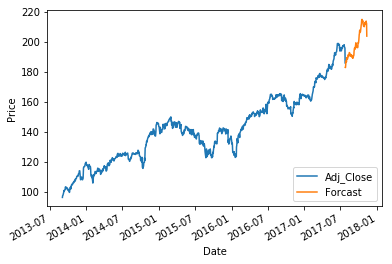

In [14]:
df=quandl.get("EOD/MMM", authtoken="xcyzkuJxNDtzUpextG5H")
display(df)
df=df[['Open','High','Low','Close','Volume','Dividend','Split','Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]
df['HL_PCT']=(df['Adj_High']-df['Adj_Close'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0
df=df[['Adj_Close','HL_PCT','PCT_change']]
forcast='Adj_Close'
df.fillna(-99,inplace=True)

forcastout=int(math.ceil(0.1*len(df)))#rounds up to integer value
df['label']=df[forcast].shift(-forcastout)


X=np.array(df.drop(['label'],1))#drop will return a new dataframe
#feature will be captal X, label will be lower case y
X=X[:-forcastout]
X=preprocessing.scale(X)
X_lat=X[-forcastout:]
display(X)
df.dropna(inplace=True)
y=np.array(df['label'])
y=np.array(df['label'])
display(y)
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.3)
clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
#display(accuracy,forcastout)
forcast_set=clf.predict(X_lat)
style.use=('ggplot')
df['Forcast']=np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400#how many seconds per day
next_unix=last_unix+one_day

for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj_Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
print('accuracy: ',accuracy)
plt.savefig('stock1.jpg',dpi=1400)
df.to_csv('suu.csv')

accuracy:  0.16296642615583268


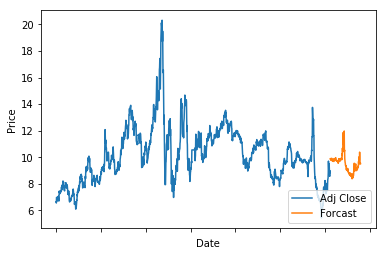

In [5]:
df=pd.read_csv('S.csv')
df.set_index('Date',inplace=True)
df['HL_PCT']=(df['High']-df['Adj Close'])/df['Adj Close']*100.0
df['PCT_change']=(df['Adj Close']-df['Open'])/df['Open']*100.0
df=df[['Adj Close','HL_PCT','PCT_change']]
forcast='Adj Close'
df.fillna(-99,inplace=True)
forcastout=int(math.ceil(0.1*len(df)))#rounds up to integer value
df['label']=df[forcast].shift(-forcastout)


X=np.array(df.drop(['label'],1))#drop will return a new dataframe
#feature will be captal X, label will be lower case y
X=X[:-forcastout]
X=preprocessing.scale(X)
X_lat=X[-forcastout:]

df.dropna(inplace=True)

y=np.array(df['label'])
y=np.array(df['label'])
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)
clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
#display(accuracy,forcastout)
forcast_set=clf.predict(X_lat)
style.use=('ggplot')


df['Forcast']=np.nan
last_date=df.iloc[-1].name
dt=datetime.datetime.strptime(last_date, '%Y-%m-%d')
last_unix=dt.timestamp()
one_day=86400#how many seconds per day
next_unix=last_unix+one_day

for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
print('accuracy: ',accuracy)
plt.savefig('stock.jpg',dpi=1600)

In [29]:
df=quandl.get("EOD/MMM", authtoken="xcyzkuJxNDtzUpextG5H")
df=df[['Open','High','Low','Close','Volume','Dividend','Split','Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]
df['HL_PCT']=(df['Adj_High']-df['Adj_Close'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0
df=df[['Adj_Close','HL_PCT','PCT_change']]
forcast='Adj_Close'
df.fillna(-99,inplace=True)

forcastout=int(math.ceil(0.01*len(df)))#rounds up to integer value
df['label']=df[forcast].shift(-forcastout)
df.dropna(inplace=True)

X=np.array(df.drop(['label'],1))#drop will return a new dataframe
#feature will be captal X, label will be lower case y
y=np.array(df['label'])
X=preprocessing.scale(X)
df.dropna(inplace=True)
y=np.array(df['label'])
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2)
clf=sklearn.svm.SVR(kernel='poly')
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
display(accuracy,forcastout)

C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5498681120948896

11

In [97]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x, order='F')

array([1, 4, 2, 5, 3, 6])

In [98]:
np.ravel(x, order='A')

array([1, 2, 3, 4, 5, 6])

In [105]:
np.ravel(x, order='K')

array([1, 2, 3, 4, 5, 6])